In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import datetime
import re 
import math
from sklearn import preprocessing
from dateutil import parser
import warnings
import imblearn
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split 
import sklearn.linear_model
import sklearn.ensemble 
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EXPLORATION

In [104]:
## Read csvs
df = pd.read_csv('/content/drive/Shareddrives/FML Assignment 3/spotify.csv', index_col=0)

In [105]:
df.count

<bound method DataFrame.count of        Highest Charting Position  Number of Times Charted  ... Valence  Chord
Index                                                      ...               
1                              1                        8  ...   0.589      B
2                              2                        3  ...   0.478  C#/Db
3                              1                       11  ...   0.688      A
4                              3                        5  ...   0.591      B
5                              5                        1  ...   0.894  D#/Eb
...                          ...                      ...  ...     ...    ...
1552                         195                        1  ...   0.608      A
1553                         196                        1  ...   0.714      B
1554                         197                        1  ...   0.394      D
1555                         198                        1  ...   0.881      F
1556                         19

In [106]:
df.dtypes

Highest Charting Position     int64
Number of Times Charted       int64
Week of Highest Charting     object
Song Name                    object
Streams                      object
Artist                       object
Artist Followers             object
Song ID                      object
Genre                        object
Release Date                 object
Weeks Charted                object
Popularity                   object
Danceability                 object
Energy                       object
Loudness                     object
Speechiness                  object
Acousticness                 object
Liveness                     object
Tempo                        object
Duration (ms)                object
Valence                      object
Chord                        object
dtype: object

In [107]:
df['Artist Followers'] = pd.to_numeric(df['Artist Followers'], errors='coerce')
df['Popularity'] = pd.to_numeric(df['Popularity'], errors='coerce')
df['Danceability'] = pd.to_numeric(df['Danceability'], errors='coerce')
df['Energy'] = pd.to_numeric(df['Energy'], errors='coerce')
df['Loudness'] = pd.to_numeric(df['Loudness'], errors='coerce')
df['Speechiness'] = pd.to_numeric(df['Speechiness'], errors='coerce')
df['Acousticness'] = pd.to_numeric(df['Acousticness'], errors='coerce')
df['Liveness'] = pd.to_numeric(df['Liveness'], errors='coerce')
df['Tempo'] = pd.to_numeric(df['Tempo'], errors='coerce')
df['Duration (ms)'] = pd.to_numeric(df['Duration (ms)'], errors='coerce')
df['Valence'] = pd.to_numeric(df['Valence'], errors='coerce')
df['Tempo'] = pd.to_numeric(df['Tempo'], errors='coerce')
df['Streams'] = df['Streams'].str.replace(",","")
df['Streams'] = pd.to_numeric(df['Streams'], errors='coerce')


In [108]:
df.dtypes

Highest Charting Position      int64
Number of Times Charted        int64
Week of Highest Charting      object
Song Name                     object
Streams                        int64
Artist                        object
Artist Followers             float64
Song ID                       object
Genre                         object
Release Date                  object
Weeks Charted                 object
Popularity                   float64
Danceability                 float64
Energy                       float64
Loudness                     float64
Speechiness                  float64
Acousticness                 float64
Liveness                     float64
Tempo                        float64
Duration (ms)                float64
Valence                      float64
Chord                         object
dtype: object

In [109]:
df.describe()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
count,1556.000000,1556.000000,1.556000e+03,1.545000e+03,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,87.744216,10.668380,6.340219e+06,1.471690e+07,70.089320,0.689997,0.633495,-6.348474,0.123656,0.248695,0.181202,122.811023,197940.816828,0.514704
std,58.147225,16.360546,3.369479e+06,1.667579e+07,15.824034,0.142444,0.161577,2.509281,0.110383,0.250326,0.144071,29.591088,47148.930420,0.227326
min,1.000000,1.000000,4.176083e+06,4.883000e+03,0.000000,0.150000,0.054000,-25.166000,0.023200,0.000025,0.019700,46.718000,30133.000000,0.032000
25%,37.000000,1.000000,4.915322e+06,2.123734e+06,65.000000,0.599000,0.532000,-7.491000,0.045600,0.048500,0.096600,97.960000,169266.000000,0.343000
50%,80.000000,4.000000,5.275748e+06,6.852509e+06,73.000000,0.707000,0.642000,-5.990000,0.076500,0.161000,0.124000,122.012000,193591.000000,0.512000
75%,137.000000,12.000000,6.455044e+06,2.269875e+07,80.000000,0.796000,0.752000,-4.711000,0.165000,0.388000,0.217000,143.860000,218902.000000,0.691000
max,200.000000,142.000000,4.863345e+07,8.333778e+07,100.000000,0.980000,0.970000,1.509000,0.884000,0.994000,0.962000,205.272000,588139.000000,0.979000


In [110]:
df = df.drop(labels = ['Weeks Charted','Song ID'], axis=1)

In [111]:
df.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
Index,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762.0,"['indie rock italiano', 'italian pop']",2017-12-08,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B
2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022.0,['australian hip hop'],2021-07-09,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db
3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514.0,['pop'],2021-05-21,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A
4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380.0,"['pop', 'uk pop']",2021-06-25,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B
5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565.0,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb


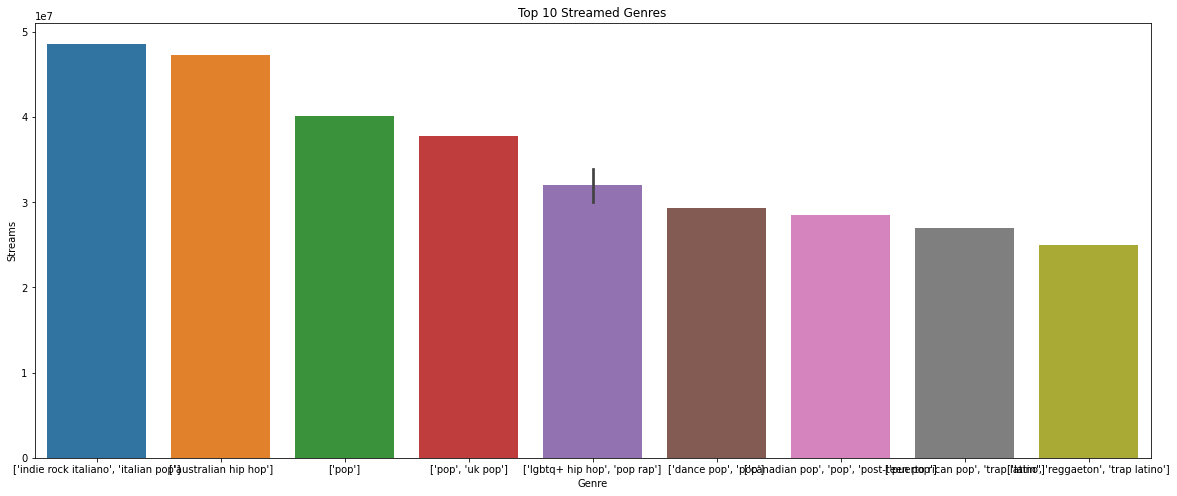

In [112]:
sort_streams=df.sort_values(by=['Streams'],ascending=False)
#Plotting Barchart about top 10 Genres and their total Streams
plt.figure(figsize=(20,8))
plt.title("Top 10 Streamed Genres")
sns.barplot(x='Genre',y='Streams',data=sort_streams.head(10))

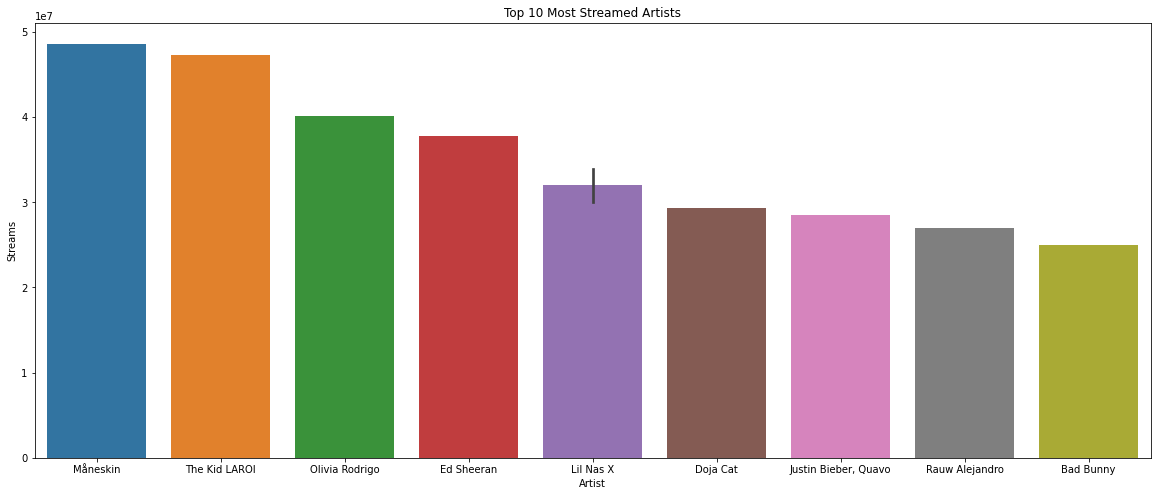

In [113]:
#Plotting Barchart about artist and their total streams
plt.figure(figsize=(20,8))
plt.title("Top 10 Most Streamed Artists")
sns.barplot(x='Artist',y='Streams',data=sort_streams.head(10))

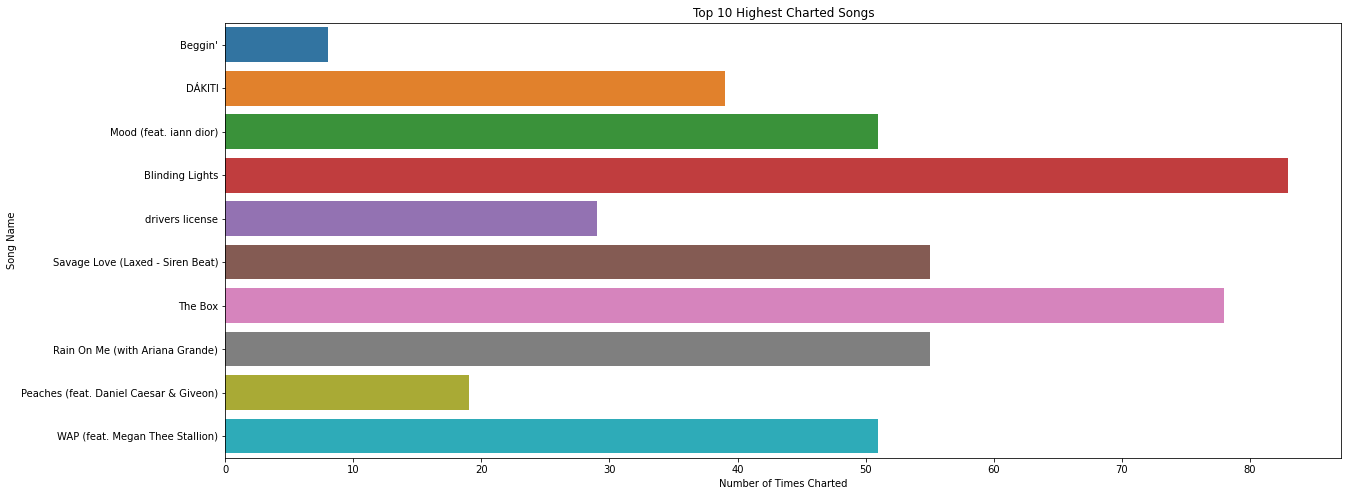

In [114]:
#Sorting the dataset by Highest Charting Position
sort_chart=df.sort_values(by=['Highest Charting Position'],ascending=True)
sort_chart
#Plotting Barchart about artist and their followers
plt.figure(figsize=(20,8))
plt.title("Top 10 Highest Charted Songs")
sns.barplot(x='Number of Times Charted',y='Song Name',data=sort_chart.head(10))

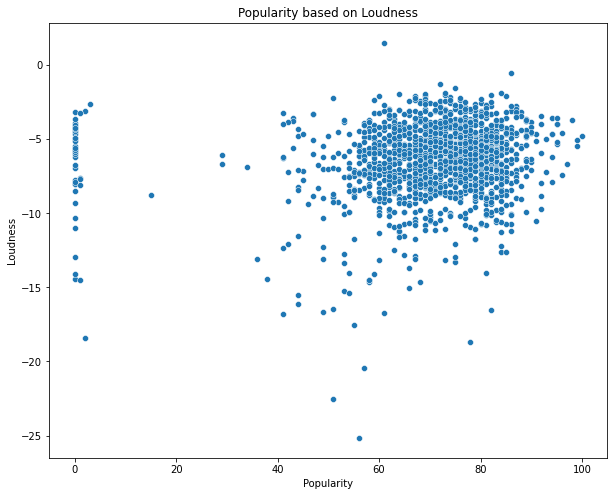

In [115]:
#Scatterplot of Popularity of Genres based on Loudness
plt.figure(figsize=(10,8))
plt.title("Popularity based on Loudness")
sns.scatterplot(x='Popularity',y='Loudness',data=df)

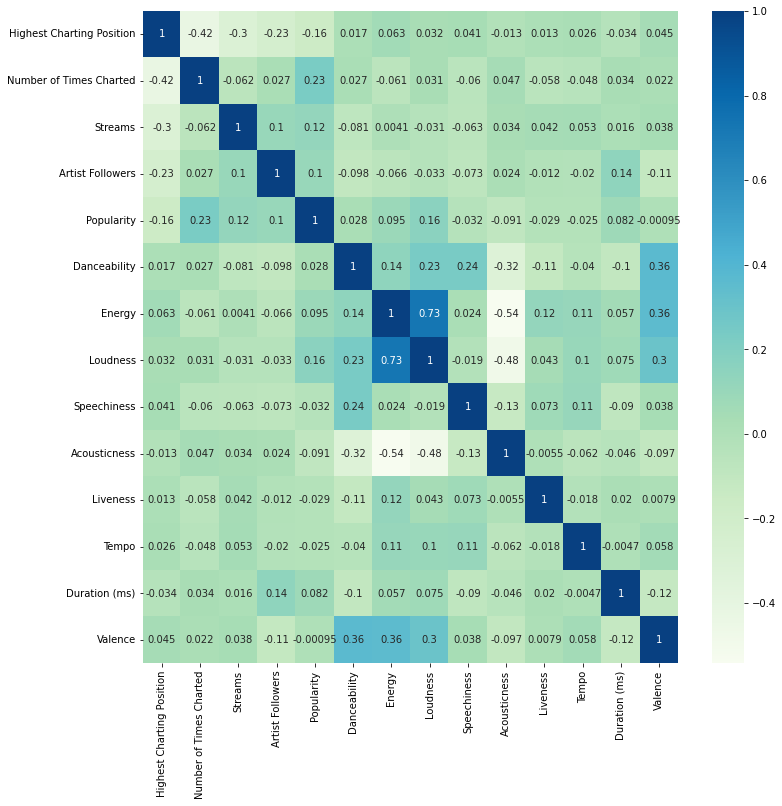

In [116]:
#Calculating Correlation
corr=df.corr()

#Plotting Correlation
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap="GnBu")

## Check for outliers

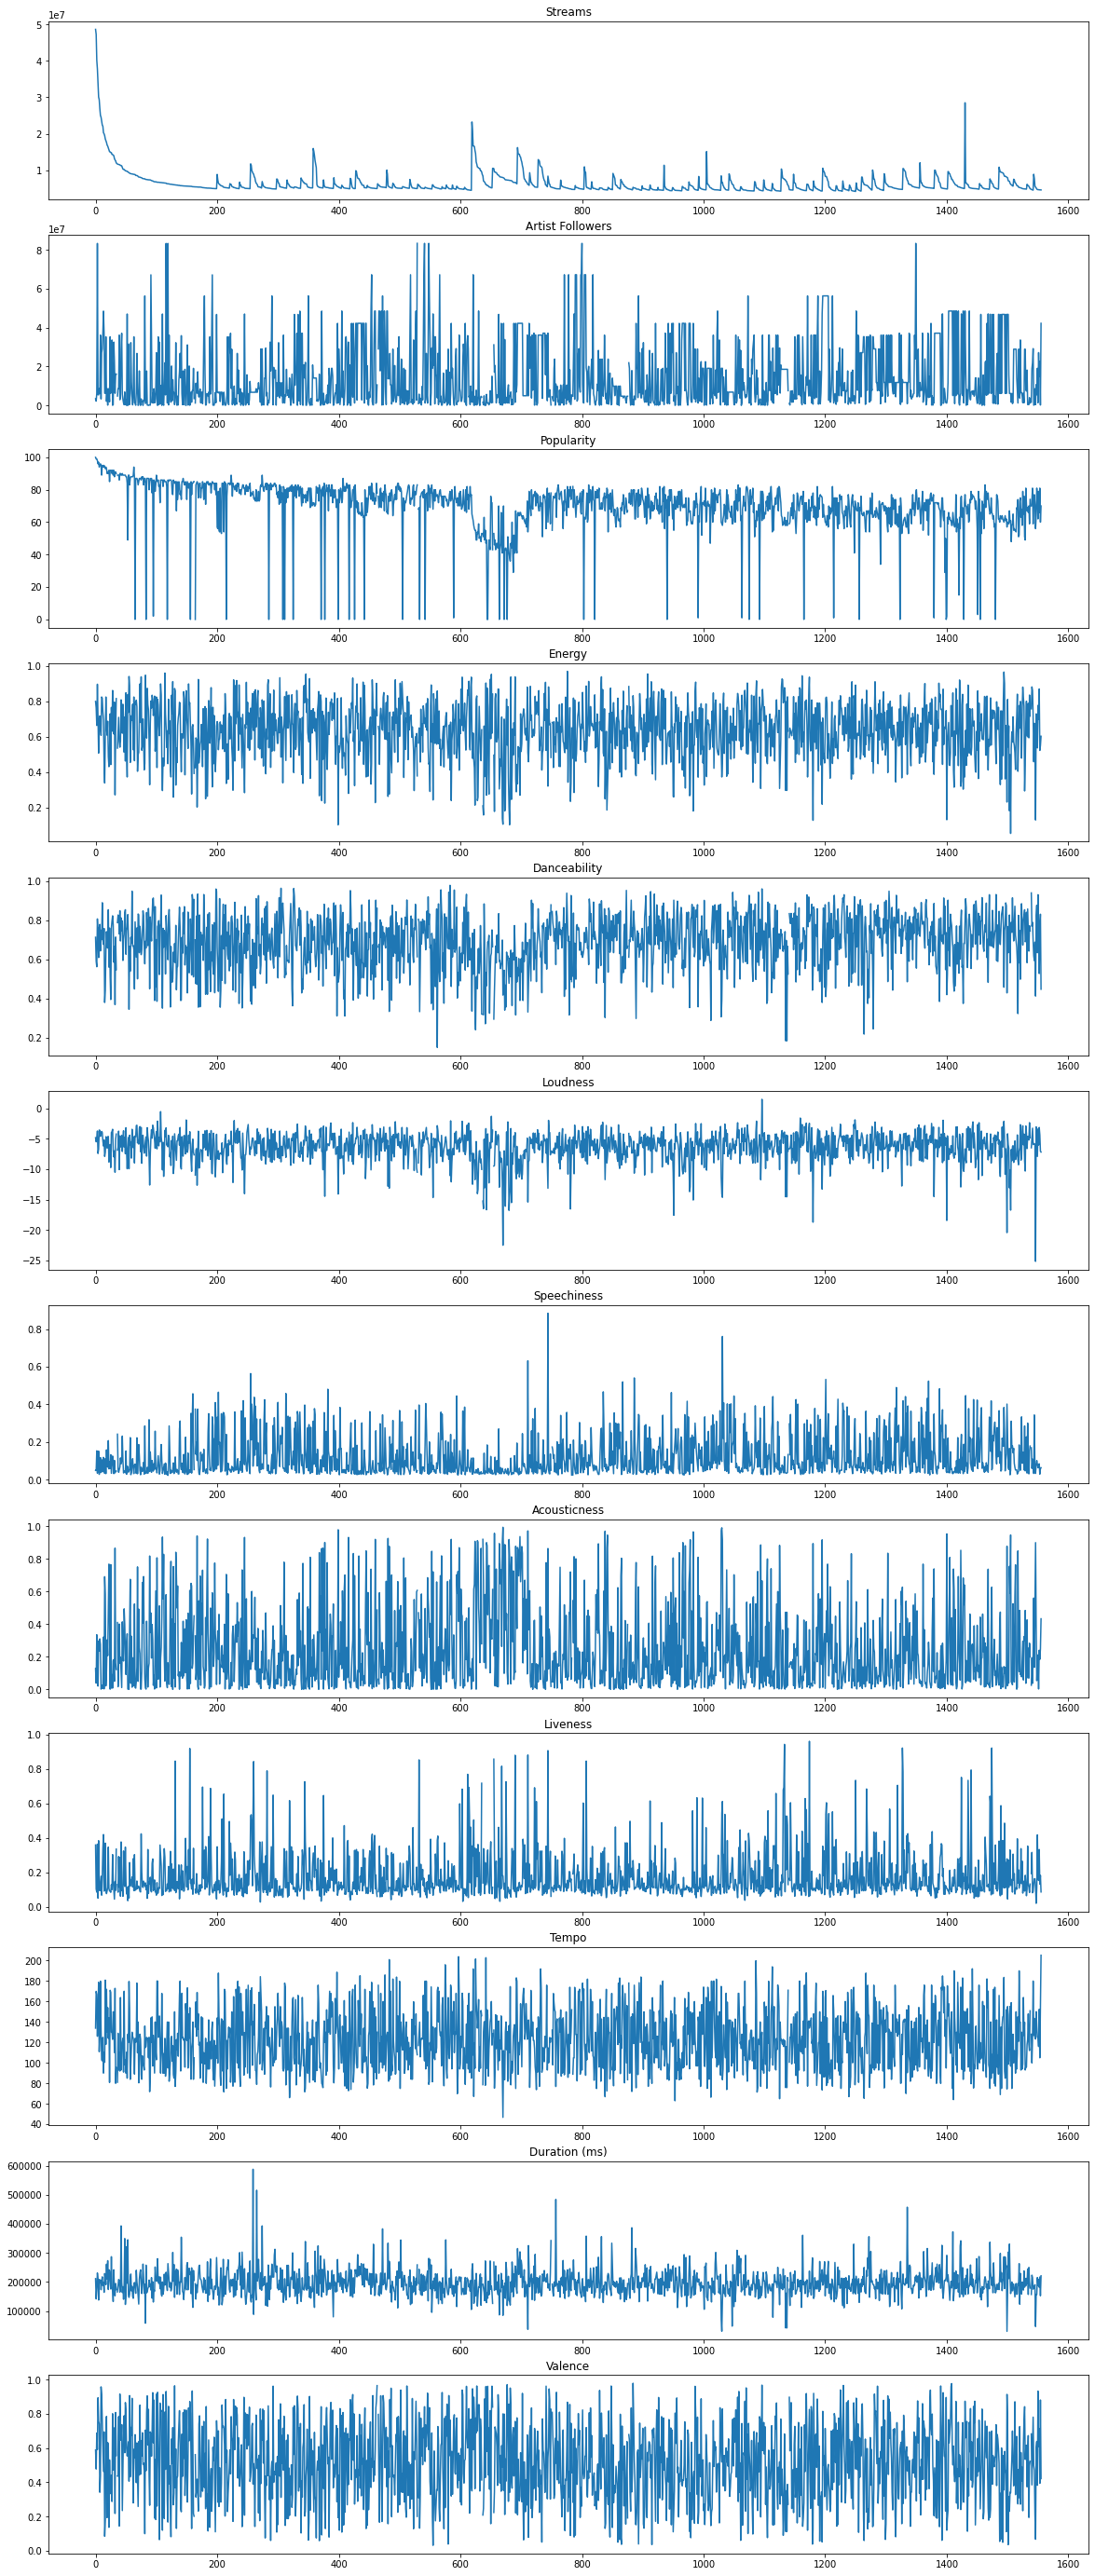

In [117]:
# instead of checking their abosulte values, I used log here to make the outliers more significant
def check_outliers(df,num_features):
  fig, ax = plt.subplots(nrows=12, ncols=1, figsize=(20,50))
  i=0
  for column in num_features:
      Xplot = df[column]
      
      ax[i].plot(np.arange(len(df)), Xplot)
      ax[i].set_title(column)
      i+=1

# plt.plot(np.arange(len(clean_train_df)), clean_train_df['images'])
# plt.show()

num_features=['Streams', 'Artist Followers', 'Popularity', 'Energy','Danceability', 'Loudness','Speechiness', 'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence' ]
check_outliers(df,num_features) #

# FEATURE ENGINEERING

## Collaboration

In [118]:
def collaboration (row):
   if "feat" in row['Song Name']  :
      return 1
   elif "with" in row['Song Name']  :
      return 1
   else:
      return 0

df['Collaboration'] = df.apply(lambda row: collaboration(row), axis=1)

def Remix (row):
   if "Remix" in row['Song Name']  :
      return 1
   else:
      return 0

df['Remix'] = df.apply(lambda row: Remix(row), axis=1)

In [119]:
#Dropping the data columns 
df_predict = df.drop(["Song Name"], axis=1)
df_predict.shape

(1556, 21)

## Date transformation to datetime format & creation of Seniority column

In [120]:
## CREATE A SENIORITY COLUMN
len(df_predict['Release Date'][1])

import datetime

# function to change format to '%Y-%m-%d' for all rows

def func(x):
  idx = 0
  if len(x) == 4:
    x = x+'-01-01'
    idx += 1
  elif len(x) ==7:
    x = x+'-01'
    idx += 1
  elif len(x) ==10:
    idx += 1
  elif x == ' ':
    idx += 1
    # if there is no date, we make the hypothesis that the highest charting week is the one of the released
    x = df_predict['Week of Highest Charting'][idx][0:10]
  else:
    x = x
  return x

# apply the function
df_predict['Release Date'] = df_predict['Release Date'].apply(func)

# convert to datetime
df_predict['Release Date'] = pd.to_datetime(df_predict['Release Date'], format='%Y-%m-%d')

In [121]:
# create a new column Anteriority which is the difference between the latest song realised and the release date of every song

df_predict['Seniority'] = (abs((max(df_predict['Release Date'])- (df_predict['Release Date'])).dt.days))/365

In [122]:
df_predict.head()

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Streams,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Collaboration,Remix,Seniority
Index,,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,48633449,Måneskin,3377762.0,"['indie rock italiano', 'italian pop']",2017-12-08,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560.0,0.589,B,0,0,3.682192
2,2,3,2021-07-23--2021-07-30,47248719,The Kid LAROI,2230022.0,['australian hip hop'],2021-07-09,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806.0,0.478,C#/Db,1,0,0.095890
3,1,11,2021-06-25--2021-07-02,40162559,Olivia Rodrigo,6266514.0,['pop'],2021-05-21,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147.0,0.688,A,0,0,0.230137
4,3,5,2021-07-02--2021-07-09,37799456,Ed Sheeran,83293380.0,"['pop', 'uk pop']",2021-06-25,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041.0,0.591,B,0,0,0.134247
5,5,1,2021-07-23--2021-07-30,33948454,Lil Nas X,5473565.0,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000.0,0.894,D#/Eb,1,0,0.057534


## Manual Encoding

In [123]:
# Define a function split_data that take a column/series as input and returns a list of unique element

def split_data(input):

  # create a list to append each element of the column/series
  list_element = []

  for element in input:
    data = str(element.split(','))   # For the 'Genre' column
    data = str(element.split('#/'))  # For the 'Chord' column

    data = data.replace("'","")
    data = data.replace("[","")
    data = data.replace("]","")
    data = data.replace('"','')
    data = data.replace(' ','')
    data = data.replace(', ',',')

    list_element.append(data)

  # create a list to append each unique element within the column/series

  unique_element = []

  for i in range(0,len(list_element)):
    unique = list_element[i].split(',')
    for i in range(0, len(unique)):
      u = unique[i]
      if u not in unique_element:
        unique_element.append(u)  
  
  unique_element.remove('')

  return unique_element

###Split genre and assign one genre per column 

In [124]:
# reformat each element in column Genre

def rename_genre(x):
    genres = str(x.split(','))
    genres = genres.replace("'","")
    genres = genres.replace("[","")
    genres = genres.replace("]","")
    genres = genres.replace('"','')
    genres = genres.replace(' ','')
    genres = genres.replace(',',', ')
    return genres

# apply the function
df_predict['Genre'] = df_predict['Genre'].apply(rename_genre)

In [125]:
# GET ALL UNIQUE GENRE AS A COLUMN ==> MANUAL ENCODING

unique_genre = split_data(df_predict['Genre'])

for i in unique_genre:
  df_predict[i] = 0 

df_predict.head(2)

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Streams,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Collaboration,Remix,Seniority,indierockitaliano,italianpop,australianhiphop,pop,ukpop,lgbtq+hiphop,poprap,dancepop,puertoricanpop,traplatino,latin,reggaeton,reggaetoncolombiano,k-pop,k-popboygroup,canadianpop,post-teenpop,canadiancontemporaryr&b,...,r&benespanol,popreggaeton,trapchileno,westcoastrap,jazzfunk,belgianhiphop,rapbelge,r&bbrasileiro,rapcearense,trapbrasileiro,scandipop,swedishpop,indier&b,jawaiian,floridarap,acousticpop,germancloudrap,perreo,christlicherrap,phillyrap,indierockism,germanundergroundrap,k-rap,chicagodrill,drill,banda,corrido,norteno,alternativepoprock,minnesotahiphop,albanianhiphop,venezuelanhiphop,memerap,grime,bregafunk,moombahton,pittsburghrap,neworleansrap,deepgermanhiphop,turkishtrap
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,48633449,Måneskin,3377762.0,"indierockitaliano, italianpop",2017-12-08,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.359,134.002,211560.0,0.589,B,0,0,3.682192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3,2021-07-23--2021-07-30,47248719,The Kid LAROI,2230022.0,australianhiphop,2021-07-09,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806.0,0.478,C#/Db,1,0,0.095890,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [126]:
#Encoding
for count, element in enumerate(df_predict['Genre']):

  genre = re.findall('\w+.\w+', df_predict.loc[count+1,"Genre"])

  if genre != []:

    for i in range(0, len(genre)):

      element = genre[i]
      
      df_predict.loc[count+1,element] = 1


# Drop 'rock-and' and 'roll' columns
df_predict.drop(columns=['rock-and', 'roll'], inplace=True)

# Encoding of the rock-and-roll column (indices 643 and 644)
df_predict.loc[643,'rock-and-roll'] = 1
df_predict.loc[644,'rock-and-roll'] = 1

In [127]:
df_predict.isna().sum().sum()

121

###Split chord and assign one chord per column 

In [128]:
df_predict['Chord'].unique()

array(['B', 'C#/Db', 'A', 'D#/Eb', 'G#/Ab', 'F#/Gb', 'C', 'D', 'A#/Bb',
       'G', 'E', 'F', ' '], dtype=object)

In [129]:
# GET ALL UNIQUE CHORD AS A COLUMN ==> MANUAL ENCODING

unique_chord = split_data(df_predict['Chord'])
unique_chord.sort() # Sort chord in alphabetical order

for i in unique_chord:
  df_predict[i] = 0 

df_predict.head(2)

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Streams,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Collaboration,Remix,Seniority,indierockitaliano,italianpop,australianhiphop,pop,ukpop,lgbtq+hiphop,poprap,dancepop,puertoricanpop,traplatino,latin,reggaeton,reggaetoncolombiano,k-pop,k-popboygroup,canadianpop,post-teenpop,canadiancontemporaryr&b,...,indier&b,jawaiian,floridarap,acousticpop,germancloudrap,perreo,christlicherrap,phillyrap,indierockism,germanundergroundrap,k-rap,chicagodrill,drill,banda,corrido,norteno,alternativepoprock,minnesotahiphop,albanianhiphop,venezuelanhiphop,memerap,grime,bregafunk,moombahton,pittsburghrap,neworleansrap,deepgermanhiphop,turkishtrap,A,Ab,B,Bb,C,D,Db,E,Eb,F,G,Gb
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,48633449,Måneskin,3377762.0,"indierockitaliano, italianpop",2017-12-08,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.359,134.002,211560.0,0.589,B,0,0,3.682192,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3,2021-07-23--2021-07-30,47248719,The Kid LAROI,2230022.0,australianhiphop,2021-07-09,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806.0,0.478,C#/Db,1,0,0.095890,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [130]:
#Encoding
for count, element in enumerate(df_predict['Chord']):

  chords = re.findall('\w+', df_predict.loc[count+1,"Chord"])

  if genre != []:

    for i in range(0, len(chords)):

      element = chords[i]
      
      df_predict.loc[count+1,element] = 1

In [131]:
df_predict.isna().sum().sum()

121

###Split artist and assign one artist per column 

In [132]:
# Define a function return the list of unique artist
def split_artist(input):

  # create a list to append each element of the column
  list_artists = []

  for element in input:

    artists= re.findall("[^\s,'][^,']+", element)

    list_artists.append(artists)

  # create a list to append each unique element within the column/series

  unique_artist = []

  for row in range(0,len(list_artists)):
    for element in range(0,len(list_artists[row])):
      artist = list_artists[row][element]

      if artist not in unique_artist:
        unique_artist.append(artist)

  return unique_artist

In [133]:
unique_artists = split_artist(df_predict['Artist'])

for i in unique_artists:
  df_predict[i] = 0 

df_predict.head(2)

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Streams,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Collaboration,Remix,Seniority,indierockitaliano,italianpop,australianhiphop,pop,ukpop,lgbtq+hiphop,poprap,dancepop,puertoricanpop,traplatino,latin,reggaeton,reggaetoncolombiano,k-pop,k-popboygroup,canadianpop,post-teenpop,canadiancontemporaryr&b,...,Zion,SHAED,Thiaguinho MT,Mila,JS o Mão de Ouro,PEDRO SAMPAIO,Felipe Original,K CAMP,Major Lazer,Reik,Lalo Ebratt,Sandro Cavazza,Joker Bra,Mac Miller,Quavo,Ant Saunders,Lil Wayne,Piso 21,Red Velvet,El Guincho,Snow,Matthew Wilder,Oliver Heldens,Meek Mill,Gzuz,ELIF,Murda,Ezhel,Sam Feldt,Gambi,Maes,Sheck Wes,French Montana,Lexa,Gradur,Heuss L,enfoiré,Dadá Boladão,Tati Zaqui,OIK
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,8,2021-07-23--2021-07-30,48633449,Måneskin,3377762.0,"indierockitaliano, italianpop",2017-12-08,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.359,134.002,211560.0,0.589,B,0,0,3.682192,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,3,2021-07-23--2021-07-30,47248719,The Kid LAROI,2230022.0,australianhiphop,2021-07-09,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806.0,0.478,C#/Db,1,0,0.095890,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [134]:
#Encoding
for count, element in enumerate(df_predict['Artist']):

  artist = re.findall("[^\s,'][^,']+", df_predict.loc[count+1,"Artist"])

  if genre != []:

    for i in range(0, len(artist)):

      element = artist[i]
      
      df_predict.loc[count+1,element] = 1


# Correct the encoding for the artist named "Heuss L'enfoiré"

# Drop 'Heuss L' and 'roll' columns
df_predict.drop(columns=['Heuss L', 'enfoiré'], inplace=True)
df_predict["Heuss L'enfoiré"] = 0 

# Encoding of the "Heuss L'enfoiré" column (indices 1551)
df_predict.loc[1551,"Heuss L'enfoiré"] = 1

# Correct the encoding for the artist named "Tyler, The Creator"
# Rename Tyler column
df_predict.rename(columns ={"Tyler": "Tyler, The Creator"}, inplace=True)

# Drop "The Creator" column
df_predict.drop(columns="The Creator", inplace=True)

In [135]:
df_predict.isna().sum().sum()

121

In [136]:
df_predict = df_predict[df_predict['Loudness'].isna()!=True]

In [137]:
df_predict[df_predict['Collaboration'].isna()==True]

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Streams,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Collaboration,Remix,Seniority,indierockitaliano,italianpop,australianhiphop,pop,ukpop,lgbtq+hiphop,poprap,dancepop,puertoricanpop,traplatino,latin,reggaeton,reggaetoncolombiano,k-pop,k-popboygroup,canadianpop,post-teenpop,canadiancontemporaryr&b,...,Rich Music LTD,Zion,SHAED,Thiaguinho MT,Mila,JS o Mão de Ouro,PEDRO SAMPAIO,Felipe Original,K CAMP,Major Lazer,Reik,Lalo Ebratt,Sandro Cavazza,Joker Bra,Mac Miller,Quavo,Ant Saunders,Lil Wayne,Piso 21,Red Velvet,El Guincho,Snow,Matthew Wilder,Oliver Heldens,Meek Mill,Gzuz,ELIF,Murda,Ezhel,Sam Feldt,Gambi,Maes,Sheck Wes,French Montana,Lexa,Gradur,Dadá Boladão,Tati Zaqui,OIK,Heuss L'enfoiré
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [138]:
df_predict.shape

(1545, 1076)

In [139]:
df_original=df_predict

In [140]:
df_predict=df_predict.reset_index(drop=True)

In [141]:
df_predict

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Streams,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Collaboration,Remix,Seniority,indierockitaliano,italianpop,australianhiphop,pop,ukpop,lgbtq+hiphop,poprap,dancepop,puertoricanpop,traplatino,latin,reggaeton,reggaetoncolombiano,k-pop,k-popboygroup,canadianpop,post-teenpop,canadiancontemporaryr&b,...,Rich Music LTD,Zion,SHAED,Thiaguinho MT,Mila,JS o Mão de Ouro,PEDRO SAMPAIO,Felipe Original,K CAMP,Major Lazer,Reik,Lalo Ebratt,Sandro Cavazza,Joker Bra,Mac Miller,Quavo,Ant Saunders,Lil Wayne,Piso 21,Red Velvet,El Guincho,Snow,Matthew Wilder,Oliver Heldens,Meek Mill,Gzuz,ELIF,Murda,Ezhel,Sam Feldt,Gambi,Maes,Sheck Wes,French Montana,Lexa,Gradur,Dadá Boladão,Tati Zaqui,OIK,Heuss L'enfoiré
0,1,8,2021-07-23--2021-07-30,48633449,Måneskin,3377762.0,"indierockitaliano, italianpop",2017-12-08,100.0,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560.0,0.589,B,0,0,3.682192,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,2021-07-23--2021-07-30,47248719,The Kid LAROI,2230022.0,australianhiphop,2021-07-09,99.0,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806.0,0.478,C#/Db,1,0,0.095890,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,11,2021-06-25--2021-07-02,40162559,Olivia Rodrigo,6266514.0,pop,2021-05-21,99.0,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147.0,0.688,A,0,0,0.230137,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,5,2021-07-02--2021-07-09,37799456,Ed Sheeran,83293380.0,"pop, ukpop",2021-06-25,98.0,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041.0,0.591,B,0,0,0.134247,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,2021-07-23--2021-07-30,33948454,Lil Nas X,5473565.0,"lgbtq+hiphop, poprap",2021-07-23,96.0,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000.0,0.894,D#/Eb,1,0,0.057534,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,195,1,2019-12-27--2020-01-03,4630675,Dua Lipa,27167675.0,"dancepop, pop, ukpop",2017-06-02,79.0,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,209320.0,0.608,A,0,0,4.200000,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1541,196,1,2019-12-27--2020-01-03,4623030,Jorge & Mateus,15019109.0,"sertanejo, sertanejouniversitario",2019-10-11,66.0,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,181930.0,0.714,B,0,0,1.841096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1542,197,1,2019-12-27--2020-01-03,4620876,Camila Cabello,22698747.0,"dancepop, electropop, pop, post-teenpop",2018-01-12,81.0,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,217307.0,0.394,D,1,0,3.586301,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1543,198,1,2019-12-27--2020-01-03,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630.0,"bregafunk, funkcarioca",2019-09-25,60.0,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,152784.0,0.881,F,0,1,1.884932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0


In [142]:
fig = px.scatter_3d(df_predict, x= 'Artist Followers', y='Popularity', z='Highest Charting Position',
                    color='Streams')
fig.show()

## Normalization

In [143]:
#Normalize numerical features
num_features=['Highest Charting Position',	'Number of Times Charted','Artist Followers',
              'Popularity'	,'Danceability'	,'Energy'	,'Loudness'	,'Speechiness'	,'Acousticness'	,'Liveness',	'Tempo',	'Duration (ms)'	,'Valence']

train_df_num = df_predict[num_features].to_numpy(copy = True)
scaler_train = StandardScaler().fit(train_df_num)
train_df_num = pd.DataFrame(scaler_train.transform(train_df_num))

train_df_num.columns = num_features

In [144]:
#Dropping Encoded columns
df_predict.drop(columns=['Week of Highest Charting','Release Date'], inplace=True)
df_predict.drop(columns=['Genre','Chord','Artist'], inplace=True)

In [145]:
df_predict.drop(columns=num_features, inplace=True)

In [146]:
df_predict=df_predict.reset_index(drop=True)

In [147]:
train_df_categorical=df_predict.copy()


In [148]:
train_df_categorical.shape

(1545, 1058)

In [149]:
train_df_num.shape

(1545, 13)

In [150]:
clean_train_df = pd.concat([train_df_num, train_df_categorical], axis=1)

In [151]:
clean_train_df.shape

(1545, 1071)

In [152]:
df_predict=clean_train_df

## Feature Selection

###Select columns with high correlation to Streams figures

In [153]:
# Compute the correlation between features
corr = df_predict.corr()

#Compute the absolute values of correlations
corr_streams = abs(corr["Streams"])

#Get the columns with no or low correlations to the streams columns
col_low_corr = corr_streams[corr_streams < 0.01].index
col_no_corr = corr_streams[corr_streams.isna()].index

#Delete unrelevant columns from the dataset
df_predict.drop(columns=col_low_corr, inplace= True)
df_predict.drop(columns=col_no_corr, inplace= True)

###Remove genre feature having a correlation = 1 with other genre

In [154]:
genre_to_delete = ["shiverpop", "indiesurf", "surfpunk", "vegasindie", "germantrance", "rapconciencia", "madchester", "sheffieldindie", "popurbaine", "rapdominicano", "numetal"
                   , "post-grunge", "rapmetal", "hardcorehiphop", "synthpop", "deephouse", "neo-psychedelic", "metalcore", "ukmetalcore", "showtunes", "nuevoregionalmexicano", "ranchera",
                   "electrolatino", "oaklandhiphop", "rapcearense", "trapbrasileiro", "swedishpop", "chicagodrill", "corrido", "norteno"]


df_predict.drop(columns=genre_to_delete, inplace= True)

In [155]:
df_predict

,Highest Charting Position,Number of Times Charted,Artist Followers,Popularity,Danceability,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Streams,Collaboration,Seniority,indierockitaliano,italianpop,australianhiphop,pop,lgbtq+hiphop,poprap,dancepop,traplatino,latin,reggaeton,reggaetoncolombiano,k-pop,k-popboygroup,canadianpop,post-teenpop,canadiancontemporaryr&b,gauzepop,indietronica,latinhiphop,melodicrap,house,popdance,tropicalhouse,ukdance,electropop,...,Ashe,Kehlani,Lunay,BROCKHAMPTON,The 1975,Alan Walker,Pedro Capó,Ellie Goulding,Rvssian,Sasha Alex Sloan,Dominic Fike,Samra,ILLENIUM,Lennon Stella,Sub Urban,Lizzo,Bazzi,Yaviah,Dardan,Monet192,Jhené Aiko,Rich Music LTD,JS o Mão de Ouro,K CAMP,Major Lazer,Reik,Lalo Ebratt,Mac Miller,Quavo,Red Velvet,El Guincho,Snow,Oliver Heldens,Meek Mill,Sam Feldt,Gradur,Dadá Boladão,Tati Zaqui,OIK,Heuss L'enfoiré
0,-1.494070,-0.163822,-0.680196,1.890818,0.168565,0.614109,-0.663867,-0.486302,1.234497,0.378310,0.288948,0.326933,48633449,0,3.682192,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-1.476862,-0.468990,-0.749045,1.827602,-0.695212,0.344622,-0.682898,-0.840755,-0.542980,1.592785,-1.190971,-0.161512,47248719,1,0.095890,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-1.494070,0.019278,-0.506910,1.827602,-0.891844,0.520028,0.274990,0.344884,-0.668654,1.491370,-0.419951,0.762573,40162559,0,0.230137,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-1.459655,-0.346923,4.113669,1.764387,0.828687,1.051029,-0.805239,-0.806388,1.269213,0.108682,0.702262,0.335734,37799456,0,0.134247,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-1.425239,-0.591057,-0.554476,1.637956,0.323061,-0.422778,-0.563275,-0.912684,-0.910279,0.918952,0.298283,1.669055,33948454,1,0.057534,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,1.844240,-0.591057,0.746879,0.563293,0.505648,0.130547,-0.491683,-0.983375,-0.195817,-0.227778,0.241424,0.410541,4630675,0,4.200000,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1541,1.861448,-0.591057,0.018128,-0.258508,-1.137634,1.285834,-0.349404,-0.034744,1.053972,0.999238,-0.339690,0.876983,4623030,0,1.841096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1542,1.878656,-0.591057,0.478804,0.689724,0.526716,0.803468,-0.848738,-0.258525,-0.341625,-0.602506,0.410878,-0.531145,4620876,1,3.586301,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1543,1.895864,-0.591057,-0.870302,-0.637801,0.997228,-0.270096,-0.588650,0.001221,0.005538,1.056504,-0.958059,1.611850,4607385,0,1.884932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0


# Split df_predict into train and test dataset

In [156]:
training_data, testing_data = train_test_split(df_predict, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

testing_data

No. of training examples: 1236
No. of testing examples: 309


,Highest Charting Position,Number of Times Charted,Artist Followers,Popularity,Danceability,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Streams,Collaboration,Seniority,indierockitaliano,italianpop,australianhiphop,pop,lgbtq+hiphop,poprap,dancepop,traplatino,latin,reggaeton,reggaetoncolombiano,k-pop,k-popboygroup,canadianpop,post-teenpop,canadiancontemporaryr&b,gauzepop,indietronica,latinhiphop,melodicrap,house,popdance,tropicalhouse,ukdance,electropop,...,Ashe,Kehlani,Lunay,BROCKHAMPTON,The 1975,Alan Walker,Pedro Capó,Ellie Goulding,Rvssian,Sasha Alex Sloan,Dominic Fike,Samra,ILLENIUM,Lennon Stella,Sub Urban,Lizzo,Bazzi,Yaviah,Dardan,Monet192,Jhené Aiko,Rich Music LTD,JS o Mão de Ouro,K CAMP,Major Lazer,Reik,Lalo Ebratt,Mac Miller,Quavo,Red Velvet,El Guincho,Snow,Oliver Heldens,Meek Mill,Sam Feldt,Gradur,Dadá Boladão,Tati Zaqui,OIK,Heuss L'enfoiré
1482,-0.255110,-0.591057,1.925441,-0.511370,1.271109,-0.003000,0.737168,-0.940257,1.415022,0.749724,0.055845,-2.047083,9260007,0,1.572603,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1228,1.173137,0.141345,-0.849582,0.436862,0.877845,-0.097879,-0.307718,-0.102677,-0.536037,0.983046,-0.430134,1.594248,4411998,0,2.827397,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1006,1.396838,-0.591057,-0.826287,-0.637801,1.292176,-0.285244,1.996831,-0.745648,-0.001405,0.649222,-0.021382,-0.148310,4803071,1,1.076712,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
661,-1.132707,-0.530023,1.650274,-0.258508,-0.807573,-0.735320,-0.837863,1.943319,-0.529094,0.781061,0.676781,-0.733564,8115520,0,0.671233,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1422,-0.375564,-0.224856,-0.877867,-0.005646,1.235996,-1.034307,-0.469027,-0.286497,-0.742252,0.210536,0.537136,0.793375,6554824,0,2.156164,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,-1.253161,-0.468990,-0.037161,0.373646,0.561829,0.328277,-0.160002,-0.747246,-0.536037,-0.806214,-1.377334,-1.807261,7880155,0,0.249315,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
730,-1.235953,-0.530023,1.345774,0.373646,0.519693,-0.401251,0.800604,-0.800394,-0.759610,-0.267093,0.515601,0.322533,8413330,0,0.728767,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
859,0.484825,-0.591057,-0.591930,0.057569,-0.519648,-0.830198,3.591799,-0.482306,-0.029178,1.795648,-0.438494,-0.170312,6292620,0,0.882192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1085,0.983851,-0.346923,-0.870389,0.563293,-0.294925,-2.144945,-0.758115,2.546728,-0.397172,-1.548739,-0.282236,-1.393624,4473413,0,1.139726,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [157]:
#Reset indices
training_data.reset_index(drop=True, inplace=True)
testing_data.reset_index(drop=True, inplace=True)

In [158]:
#Dropping Stream Column From Test data
y_test=testing_data['Streams']
testing_data.drop('Streams', axis=1, inplace=True)

#Rename testing_data
x_test = testing_data
x_test.head()

,Highest Charting Position,Number of Times Charted,Artist Followers,Popularity,Danceability,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Collaboration,Seniority,indierockitaliano,italianpop,australianhiphop,pop,lgbtq+hiphop,poprap,dancepop,traplatino,latin,reggaeton,reggaetoncolombiano,k-pop,k-popboygroup,canadianpop,post-teenpop,canadiancontemporaryr&b,gauzepop,indietronica,latinhiphop,melodicrap,house,popdance,tropicalhouse,ukdance,electropop,colombianpop,...,Ashe,Kehlani,Lunay,BROCKHAMPTON,The 1975,Alan Walker,Pedro Capó,Ellie Goulding,Rvssian,Sasha Alex Sloan,Dominic Fike,Samra,ILLENIUM,Lennon Stella,Sub Urban,Lizzo,Bazzi,Yaviah,Dardan,Monet192,Jhené Aiko,Rich Music LTD,JS o Mão de Ouro,K CAMP,Major Lazer,Reik,Lalo Ebratt,Mac Miller,Quavo,Red Velvet,El Guincho,Snow,Oliver Heldens,Meek Mill,Sam Feldt,Gradur,Dadá Boladão,Tati Zaqui,OIK,Heuss L'enfoiré
0,-0.255110,-0.591057,1.925441,-0.511370,1.271109,-0.003000,0.737168,-0.940257,1.415022,0.749724,0.055845,-2.047083,0,1.572603,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.173137,0.141345,-0.849582,0.436862,0.877845,-0.097879,-0.307718,-0.102677,-0.536037,0.983046,-0.430134,1.594248,0,2.827397,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.396838,-0.591057,-0.826287,-0.637801,1.292176,-0.285244,1.996831,-0.745648,-0.001405,0.649222,-0.021382,-0.148310,1,1.076712,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,-1.132707,-0.530023,1.650274,-0.258508,-0.807573,-0.735320,-0.837863,1.943319,-0.529094,0.781061,0.676781,-0.733564,0,0.671233,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.375564,-0.224856,-0.877867,-0.005646,1.235996,-1.034307,-0.469027,-0.286497,-0.742252,0.210536,0.537136,0.793375,0,2.156164,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [159]:
#Setting training data into x_train and y_train
#x_train=training_data.drop(['Streams','Chord'],axis=1)
x_train=training_data.drop(['Streams'],axis=1)
y_train=training_data['Streams']

In [160]:
#Compute the log of streams
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [161]:
#Shapes of x_train,y_train and test data
x_train.shape, y_train.shape, y_train_log.shape, x_test.shape, y_test.shape, y_test_log.shape

((1236, 613), (1236,), (1236,), (309, 613), (309,), (309,))

In [162]:
x_train.dtypes

Highest Charting Position    float64
Number of Times Charted      float64
Artist Followers             float64
Popularity                   float64
Danceability                 float64
                              ...   
Gradur                         int64
Dadá Boladão                   int64
Tati Zaqui                     int64
OIK                            int64
Heuss L'enfoiré                int64
Length: 613, dtype: object

In [163]:
print([(column,min(x_train[column]),max(x_train[column]),x_train[column].isna().sum()) for column in x_train])

[('Highest Charting Position', -1.4940701683678772, 1.9302791820778769, 0), ('Number of Times Charted', -0.5910566968025428, 8.014660862009778, 0), ('Artist Followers', -0.8825239862596637, 4.116332986548433, 0), ('Popularity', -4.430729523672548, 1.890817752178965, 0), ('Danceability', -3.7921675561178465, 2.0365693601860024, 0), ('Loudness', -7.501599003677358, 3.1323786590482565, 0), ('Speechiness', -0.9103620594581346, 6.890483896979316, 0), ('Acousticness', -0.9936511504772707, 2.978304789826082, 0), ('Liveness', -1.121354690276106, 5.421288382055563, 0), ('Tempo', -2.572317098337076, 2.7875851307616712, 0), ('Duration (ms)', -3.5602536144101693, 8.278544576934896, 0), ('Valence', -2.1240901124214258, 2.0430891354821377, 0), ('Collaboration', 0, 1, 0), ('Seniority', 0.0, 79.66849315068494, 0), ('indierockitaliano', 0, 1, 0), ('italianpop', 0, 1, 0), ('australianhiphop', 0, 1, 0), ('pop', 0, 1, 0), ('lgbtq+hiphop', 0, 1, 0), ('poprap', 0, 1, 0), ('dancepop', 0, 1, 0), ('traplatino'

# MODELS

In [189]:
# Create empty lists to store the results
models =  ['Ridge Regression', 'RF', 'XGBoost', 'Decision Tree', 'KNN']
train_results = []
test_results = []

train_results_log = []
test_results_log = []

## Ridge Linear Regression

In [190]:
from sklearn.linear_model import Ridge #Ridge Regression Model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [191]:
#Ridge Regression Modelling and Training
ridge_model = Ridge(alpha=10.0)
ridge_model.fit(x_train,y_train)
y_predict = ridge_model.predict(x_train)
print("Training score: ", ridge_model.score(x_train,y_train))
print("Test score: ", ridge_model.score(x_test,y_test))

Training score:  0.3187292152559349
Test score:  0.23004857238544785


In [192]:
train_results.append(ridge_model.score(x_train,y_train))
test_results.append(ridge_model.score(x_test,y_test))

## Ridge Linear Regression with log

In [193]:
#Ridge Regression Modelling and Training
ridge_model_log = Ridge(alpha=3.5)
ridge_model_log.fit(x_train,y_train_log)
y_predict = ridge_model_log.predict(x_train)
print("Training score: ", ridge_model_log.score(x_train,y_train_log))
print("Test score: ", ridge_model_log.score(x_test,y_test_log))

Training score:  0.4003041330149819
Test score:  0.31221641960935975


In [194]:
train_results_log.append(ridge_model_log.score(x_train,y_train_log))
test_results_log.append(ridge_model_log.score(x_test,y_test_log))

##Random Forest Regression

In [195]:
# Grid Search Results: {'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50}
# RandomForestRegressor(n_estimators=50, random_state=15)

from sklearn.ensemble import RandomForestRegressor
#Random Forest Regression
r_model=RandomForestRegressor(n_estimators=50, criterion='squared_error', max_depth=None, max_features='auto', random_state=15)
r_model.fit(x_train,y_train)
print("Training score: ", r_model.score(x_train, y_train))

# Cross validation
print("5-fold cross validation results: ", cross_val_score(r_model, x_train,y_train, cv=5))

#Making predictions on test set 
r_predict=r_model.predict(x_test)
print("Test score: ",r_model.score(x_test,y_test))

Training score:  0.9734711013620053
5-fold cross validation results:  [0.73125499 0.85748934 0.82970777 0.88708762 0.77812331]
Test score:  0.8399630846114061


In [196]:
train_results.append(r_model.score(x_train,y_train))
test_results.append(r_model.score(x_test,y_test))

In [197]:
#Random Forest Regression - log(Streams)
r_model_log=RandomForestRegressor(n_estimators=50, criterion='squared_error', max_depth=None, max_features='auto', random_state=15)
r_model_log.fit(x_train,y_train_log)
print("Training score: ", r_model_log.score(x_train, y_train_log))

# Cross validation
print("5-fold cross validation results: ", cross_val_score(r_model_log, x_train,y_train_log, cv=5))

#Making predictions on test set 
r_predict=r_model_log.predict(x_test)
print("Test score: ",r_model_log.score(x_test,y_test_log))

Training score:  0.9746573192476526
5-fold cross validation results:  [0.76276201 0.83407458 0.81815865 0.85044244 0.81556373]
Test score:  0.7917219706909289


In [198]:
train_results_log.append(r_model_log.score(x_train,y_train_log))
test_results_log.append(r_model_log.score(x_test,y_test_log))

##XGBoost

In [199]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(colsample_bytree=0.7, learning_rate=0.07, max_depth=6,
             min_child_weight=4, n_estimators=250, nthread=4, random_state=15,
             silent=1, subsample=0.7)

#Fit the model
xgb_model.fit(x_train,y_train)

#Prediction train data
y_predict_train = xgb_model.predict(x_train)
print("Training score: ", r2_score(y_train, y_predict_train))

# Cross validation
print("5-fold cross validation results: ", cross_val_score(xgb_model, x_train,y_train, cv=5))

#Prediction test data
y_predict_test = xgb_model.predict(x_test)

print("Test score: ", r2_score(y_test, y_predict_test))

Training score:  0.9933394217102368
5-fold cross validation results:  [0.7940734  0.82764883 0.87993556 0.84292862 0.7265267 ]
Test score:  0.9001491408021405


In [200]:
train_results.append(xgb_model.score(x_train,y_train))
test_results.append(xgb_model.score(x_test,y_test))

In [201]:
xgb_model_log = XGBRegressor(random_state=15)

#Fit the model
xgb_model_log.fit(x_train,y_train_log)

#Prediction train data
y_predict_train = xgb_model_log.predict(x_train)

#Prediction test data
y_predict_test = xgb_model_log.predict(x_test)

print("Training score: ", r2_score(y_train_log, y_predict_train))
print("Test score: ", r2_score(y_test_log, y_predict_test))

[11:42:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training score:  0.9055576889647136
Test score:  0.8379174175711658


In [202]:
train_results_log.append(xgb_model_log.score(x_train,y_train_log))
test_results_log.append(xgb_model_log.score(x_test,y_test_log))

##DecisionTreeRegressor

In [203]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(x_train, y_train)

#Prediction train data
y_predict_train = regressor.predict(x_train)

#Prediction test data
y_predict_test = regressor.predict(x_test)

print("Training score: ", r2_score(y_train, y_predict_train))
print("Test score: ", r2_score(y_test, y_predict_test))

Training score:  1.0
Test score:  0.7435002658459793


In [204]:
train_results.append(regressor.score(x_train,y_train))
test_results.append(regressor.score(x_test,y_test))

In [205]:
# create a regressor object
regressor_log = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and log(Y) data
regressor_log.fit(x_train, y_train_log)

#Prediction train data
y_predict_train = regressor_log.predict(x_train)

#Prediction test data
y_predict_test = regressor_log.predict(x_test)

print("Training score: ", r2_score(y_train_log, y_predict_train))
print("Test score: ", r2_score(y_test_log, y_predict_test))

Training score:  1.0
Test score:  0.7039615131487291


In [206]:
train_results_log.append(regressor_log.score(x_train,y_train_log))
test_results_log.append(regressor_log.score(x_test,y_test_log))

As we can see, this is a clear case of Overfitting, which happens in many cases with Decision Trees!

##KNN Regressor

In [207]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
model.best_params_


{'n_neighbors': 6}

In [208]:
knn = KNeighborsRegressor(n_neighbors=6)
# fit the regressor with X and Y data
knn.fit(x_train, y_train)

#Prediction train data
y_predict_train = knn.predict(x_train)

#Prediction test data
y_predict_test = knn.predict(x_test)

print("Training score: ", r2_score(y_train, y_predict_train))
print("Test score: ", r2_score(y_test, y_predict_test))

Training score:  0.42995217245281203
Test score:  0.23724352432316764


In [209]:
train_results.append(knn.score(x_train,y_train))
test_results.append(knn.score(x_test,y_test))

In [210]:
knn_log = KNeighborsRegressor(n_neighbors=6)
# fit the regressor with X and log(Y) data
knn_log.fit(x_train, y_train_log)

#Prediction train data
y_predict_train = knn_log.predict(x_train)

#Prediction test data
y_predict_test = knn_log.predict(x_test)

print("Training score: ", r2_score(y_train_log, y_predict_train))
print("Test score: ", r2_score(y_test_log, y_predict_test))

Training score:  0.4618587777238329
Test score:  0.2625217458506971


In [211]:
train_results_log.append(knn_log.score(x_train,y_train_log))
test_results_log.append(knn_log.score(x_test,y_test_log))

# RESULTS

Text(0.5, 1.0, 'Results on Streams')

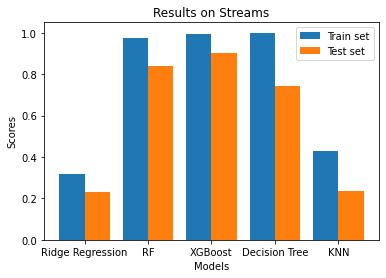

In [212]:
# Results for Streams

x = np.arange(5)
y1 = train_results
y2 = test_results
width = 0.40
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)

plt.xticks(x, models)

plt.xlabel("Models")
plt.ylabel("Scores")

plt.legend(["Train set", "Test set"])
plt.title('Results on Streams')

Text(0.5, 1.0, 'Results on log(Streams)')

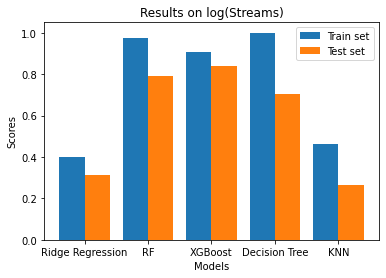

In [213]:
# Results for log-Streams

x = np.arange(5)
y1 = train_results_log
y2 = test_results_log
width = 0.40
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)

plt.xticks(x, models)

plt.xlabel("Models")
plt.ylabel("Scores")

plt.legend(["Train set", "Test set"])
plt.title('Results on log(Streams)')